In [1]:
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

print(os.listdir("C:/Users/Bommi/Desktop/Tensorflow/fruits"))
dim = 100

['fruits-360_dataset']


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def getYourFruits(fruits, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Training', 'Test']
    if not k_fold:
        path = "C:/Users/Bommi/Desktop/Tensorflow/fruits/*/fruits-360/" + data_type + "/"
        for i,f in enumerate(fruits):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , fruits[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "C:/Users/Bommi/Desktop/Tensorflow/fruits/*/fruits-360/" + v + "/"
            for i,f in enumerate(fruits):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels

In [4]:
def getAllFruits():
    fruits = []
    for fruit_path in glob.glob("C:/Users/Bommi/Desktop/Tensorflow/fruits/*/fruits-360/Training/*"):
        fruit = fruit_path.split("/")[-1]
        fruits.append(fruit)
    return fruits

In [5]:
getAllFruits()

['fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Braeburn',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Crimson Snow',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Golden 1',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Golden 2',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Golden 3',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Granny Smith',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Pink Lady',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Red 1',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Red 2',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Red 3',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Red Delicious',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Red Yellow 1',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apple Red Yellow 2',
 'fruits\\fruits-360_dataset\\fruits-360\\Training\\Apricot',
 'fruits\\fruits-360_dataset

In [6]:
#Choose your Fruits
fruits = ['Apple Pink Lady','Banana','Mandarine','Limes','Peach'] #Binary classification

#Get Images and Labels 
X_t, y_train =  getYourFruits(fruits, 'Training', print_n=True, k_fold=False)
X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

#Get data for k-fold
#X,y = getYourFruits(fruits, '', print_n=True, k_fold=True)

#Scale Data Images
#flatten the pixels to a single row for each image and constructed a matrix with flattened pixels rows
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
#X = scaler.fit_transform([i.flatten() for i in X])

There are  456   TRAINING  images of  APPLE PINK LADY
There are  490   TRAINING  images of  BANANA
There are  490   TRAINING  images of  MANDARINE
There are  490   TRAINING  images of  LIMES
There are  492   TRAINING  images of  PEACH
There are  152   TEST  images of  APPLE PINK LADY
There are  166   TEST  images of  BANANA
There are  166   TEST  images of  MANDARINE
There are  166   TEST  images of  LIMES
There are  164   TEST  images of  PEACH


In [7]:
#source from Github
def plot_image_grid(images, rows, columns):
    figure = plt.figure(figsize=(columns * 3, rows * 3))
    for i in range(columns * rows):
        figure.add_subplot(rows, columns, i + 1)
        plt.imshow(images[i])
    plt.show()

In [8]:
type(X_t)

numpy.ndarray

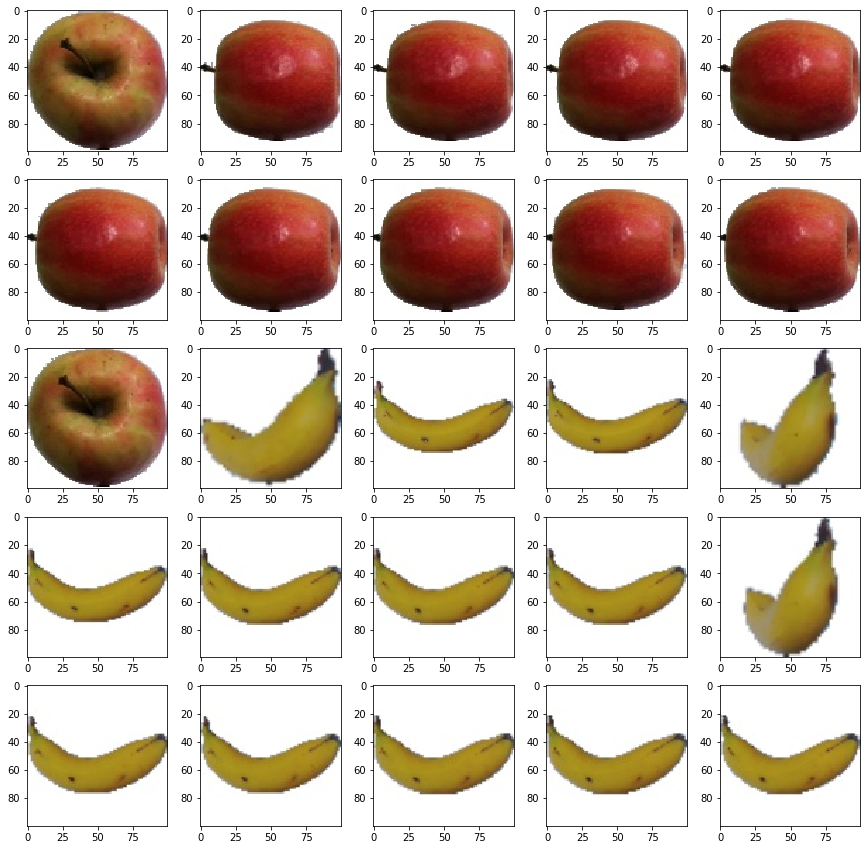

In [8]:

#Slicing a 1D npy array:
#The slice notation specifies a start and end value [start:end] and copies the list from start up to but not including end.
plot_image_grid(X_t[445:470], 5, 5)

### build model

In [9]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5)
])

### compile the model

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
len(y_train)

2418

In [56]:
len(X_train)

2418

In [14]:
X_t.shape

(2418, 100, 100, 3)

In [11]:
model.fit(X_train, y_train, epochs=5)

Train on 2418 samples
Epoch 1/5
2418/2418 [==============================] - 4s 2ms/sample - loss: 0.1156 - accuracy: 0.9814
Epoch 2/5
2418/2418 [==============================] - 2s 820us/sample - loss: 2.9628e-07 - accuracy: 1.0000
Epoch 3/5
2418/2418 [==============================] - 2s 821us/sample - loss: 2.5784e-07 - accuracy: 1.0000
Epoch 4/5
2418/2418 [==============================] - 2s 834us/sample - loss: 2.2335e-07 - accuracy: 1.0000
Epoch 5/5
2418/2418 [==============================] - 2s 775us/sample - loss: 1.9348e-07 - accuracy: 1.0000


### evaluate accuracy

In [12]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

814/814 - 1s - loss: 0.0550 - accuracy: 0.9889

Test accuracy: 0.9889435


### Making prediction

In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(X_test)

In [15]:
predictions[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [16]:
#show the label that model has the highest confidence
np.argmax(predictions[0])

0

In [17]:
#corresbond test set label
y_test[0]

0

### Grahpic Model Result

In [18]:
# write a function to match the actual test image with the predicted label. Show blue if correctly predicted.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% \n({})".format(fruits[predicted_label],
                                100*np.max(predictions_array),
                                fruits[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [19]:
X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

There are  152   TEST  images of  APPLE PINK LADY
There are  166   TEST  images of  BANANA
There are  166   TEST  images of  MANDARINE
There are  166   TEST  images of  LIMES
There are  164   TEST  images of  PEACH


In [48]:
len(X_test)

814

In [50]:
predictions

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

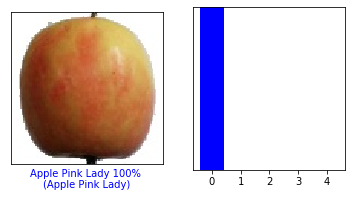

In [20]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

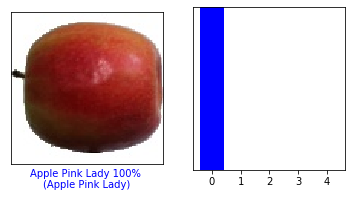

In [21]:
i = 151
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

### shuffle test data

In [22]:
from sklearn.utils import shuffle
X_shuffled,y_shuffled,predictions_shuffled = shuffle(X_test, y_test,predictions, random_state=0)

### plot several images with their predictions

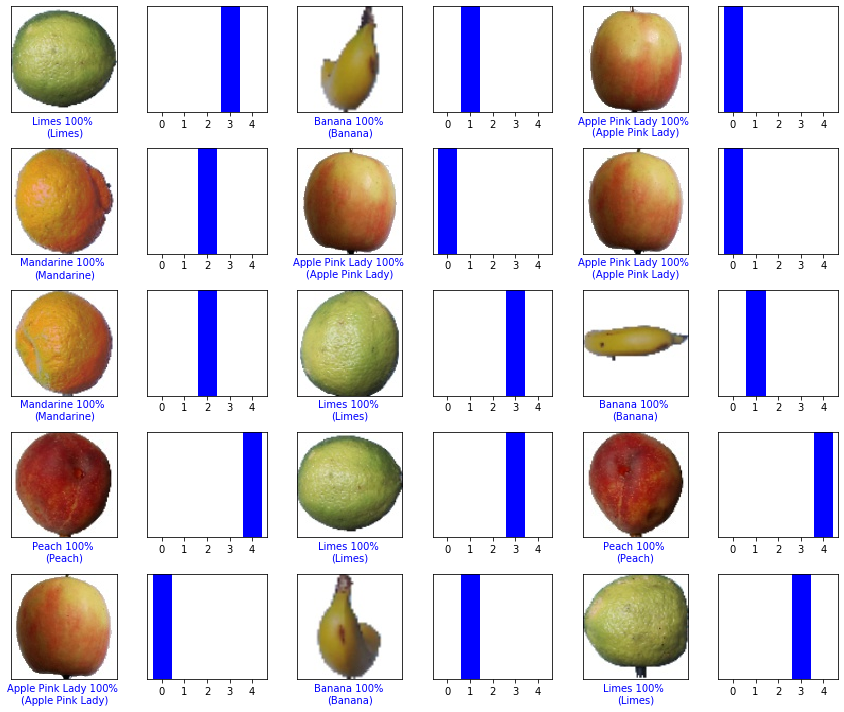

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_shuffled[i], y_shuffled, X_shuffled)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_shuffled[i], y_shuffled)
plt.tight_layout()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

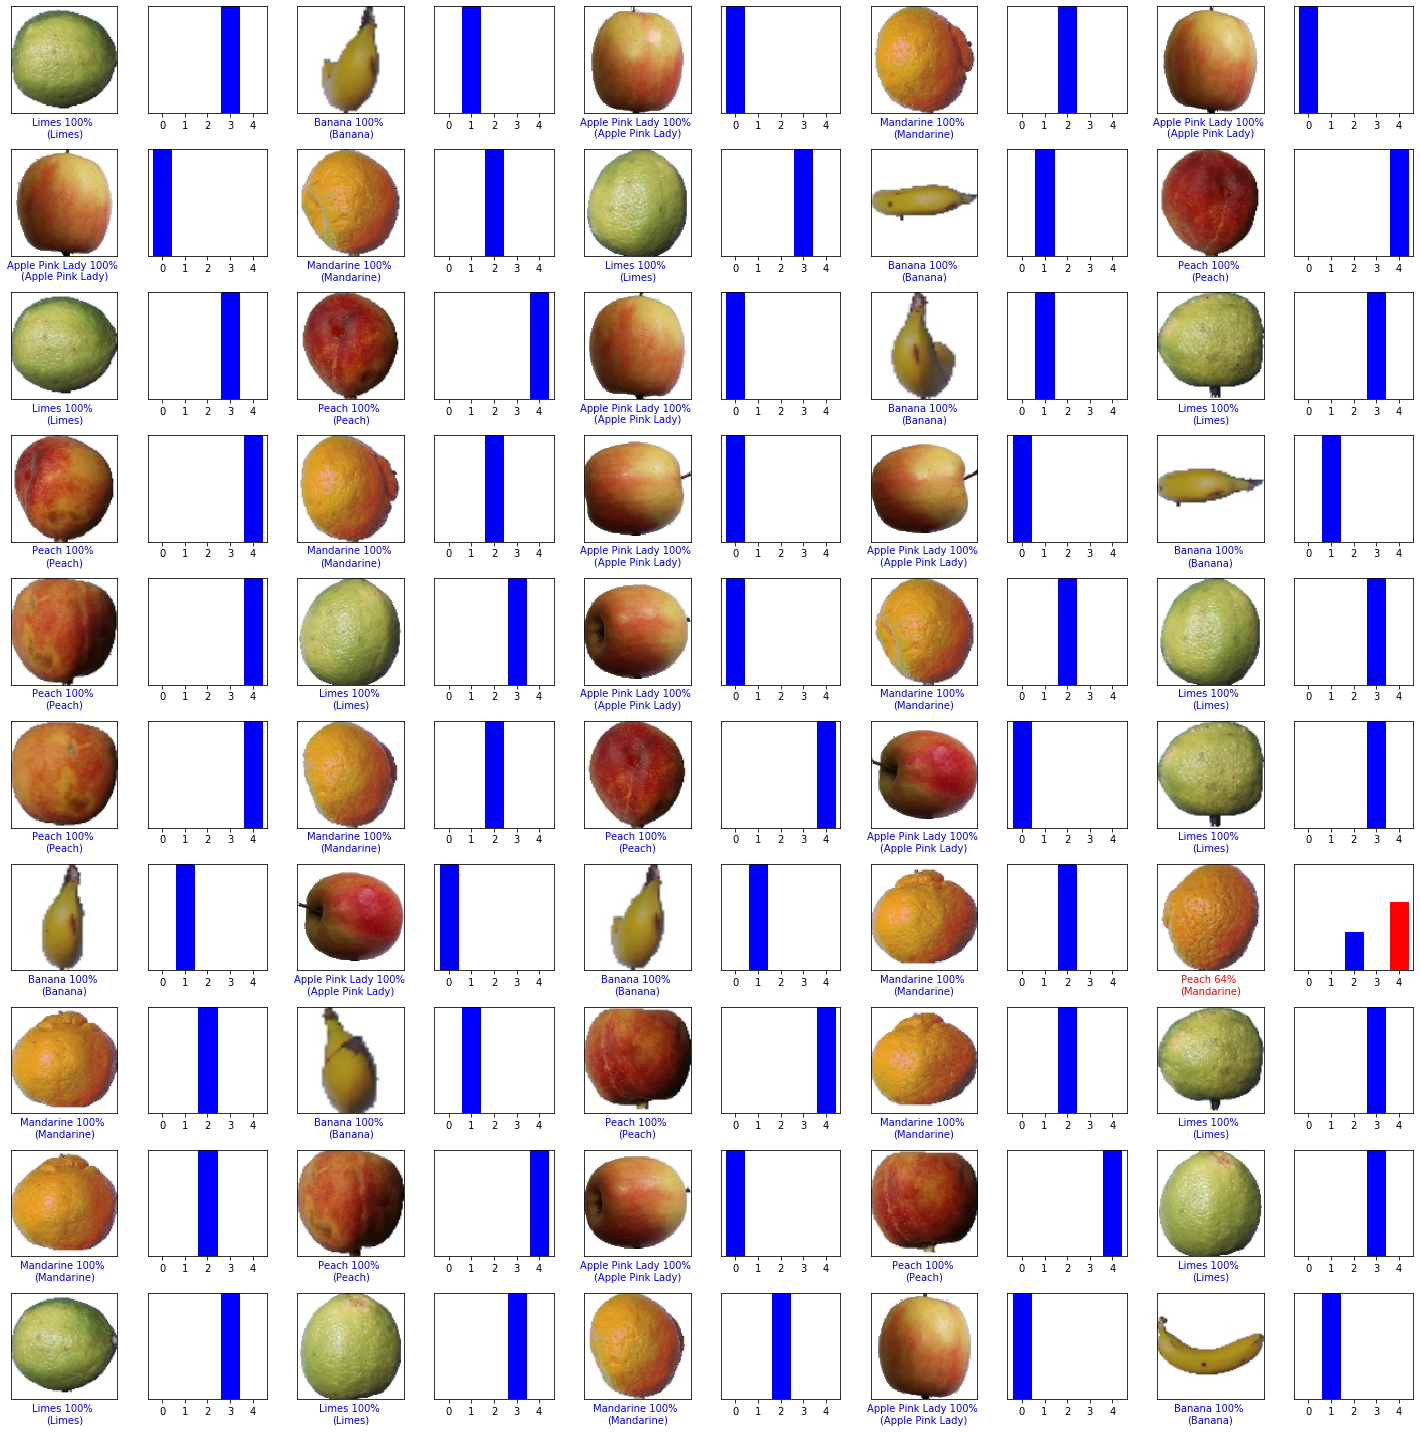

In [30]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_shuffled[i], y_shuffled, X_shuffled)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_shuffled[i], y_shuffled)
plt.tight_layout()
plt.savefig('test1.png', bbox_inches='tight')
plt.show()

### use trained model